In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import mode
from keras.models import Model
from keras.layers import Input, BatchNormalization, LSTM, Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.metrics import Precision, Recall

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pyttsx3  # require to install espeak (sudo apt/dnf install espeak)

2023-04-16 23:10:58.756275: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-16 23:10:58.809556: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-16 23:10:58.810607: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 23:10:59.804430: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('../data/characters.csv')
X = df[['flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5', 'GYRx', 'GYRy', 'GYRz', 'ACCx', 'ACCy', 'ACCz']].values
labels = df.iloc[:, -1]
label_dict = {label: i for i, label in enumerate(sorted(set(labels)))}
y = np.array([label_dict[label] for label in labels])
y = to_categorical(y, num_classes=len(label_dict))

print(label_dict)

print(X.shape, y.shape)
X = np.reshape(X, (X.shape[0]//150, 150, X.shape[1]))
y = np.reshape(y, (y.shape[0]//150, 150, y.shape[1]))
print(X.shape, y.shape)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25}
(975000, 11) (975000, 26)
(6500, 150, 11) (6500, 150, 26)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(4160, 150, 11) (1300, 150, 11) (1040, 150, 11)
(4160, 150, 26) (1300, 150, 26) (1040, 150, 26)


In [4]:
input_layer = Input(shape=(150, 11), name='input_layer')
batch_layer = BatchNormalization(name='hidden_layer1')(input_layer)
lstm_layer = LSTM(units=64, return_sequences=True, name='hidden_layer2')(batch_layer)
output_layer = Dense(units=len(label_dict), activation='softmax', name='output_layer')(lstm_layer)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy', Precision(), Recall()])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

2023-04-16 23:11:24.389645: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: fedora
2023-04-16 23:11:24.389677: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: fedora
2023-04-16 23:11:24.389820: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2023-04-16 23:11:24.389894: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 530.41.3
2023-04-16 23:11:24.892461: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]

Epoch 1/50


2023-04-16 23:11:25.518531: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-16 23:11:25.521215: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-16 23:11:25.522939: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

130/130 [==============================] - ETA: 0s - loss: 2.1264 - accuracy: 0.4597 - precision: 0.9684 - recall: 0.0957

2023-04-16 23:11:36.340493: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-16 23:11:36.342781: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-16 23:11:36.344689: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

130/130 [==============================] - 12s 80ms/step - loss: 2.1264 - accuracy: 0.4597 - precision: 0.9684 - recall: 0.0957 - val_loss: 1.4775 - val_accuracy: 0.5894 - val_precision: 0.8444 - val_recall: 0.2697
Epoch 2/50
130/130 [==============================] - 9s 73ms/step - loss: 1.2846 - accuracy: 0.6212 - precision: 0.9119 - recall: 0.3555 - val_loss: 1.0670 - val_accuracy: 0.6844 - val_precision: 0.9045 - val_recall: 0.4408
Epoch 3/50
130/130 [==============================] - 10s 73ms/step - loss: 1.0357 - accuracy: 0.6758 - precision: 0.8873 - recall: 0.4668 - val_loss: 0.8930 - val_accuracy: 0.7274 - val_precision: 0.8894 - val_recall: 0.5424
Epoch 4/50
130/130 [==============================] - 10s 77ms/step - loss: 0.9508 - accuracy: 0.6970 - precision: 0.8677 - recall: 0.5136 - val_loss: 0.7956 - val_accuracy: 0.7564 - val_precision: 0.8970 - val_recall: 0.5993
Epoch 5/50
130/130 [==============================] - 10s 73ms/step - loss: 0.9208 - accuracy: 0.6965 - prec

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 150, 11)]         0         
                                                                 
 hidden_layer1 (BatchNormali  (None, 150, 11)          44        
 zation)                                                         
                                                                 
 hidden_layer2 (LSTM)        (None, 150, 64)           19456     
                                                                 
 output_layer (Dense)        (None, 150, 26)           1690      
                                                                 
Total params: 21,190
Trainable params: 21,168
Non-trainable params: 22
_________________________________________________________________


In [6]:
results = model.evaluate(X_test, y_test)
print("Test loss:", results[0])
print("Test accuracy:", results[1])
print("Test precision:", results[2])
print("Test recall:", results[3])

41/41 [==============================] - 1s 26ms/step - loss: 0.4112 - accuracy: 0.8418 - precision: 0.8956 - recall: 0.7770
Test loss: 0.4111824929714203
Test accuracy: 0.8418461680412292
Test precision: 0.8955705761909485
Test recall: 0.7770153880119324


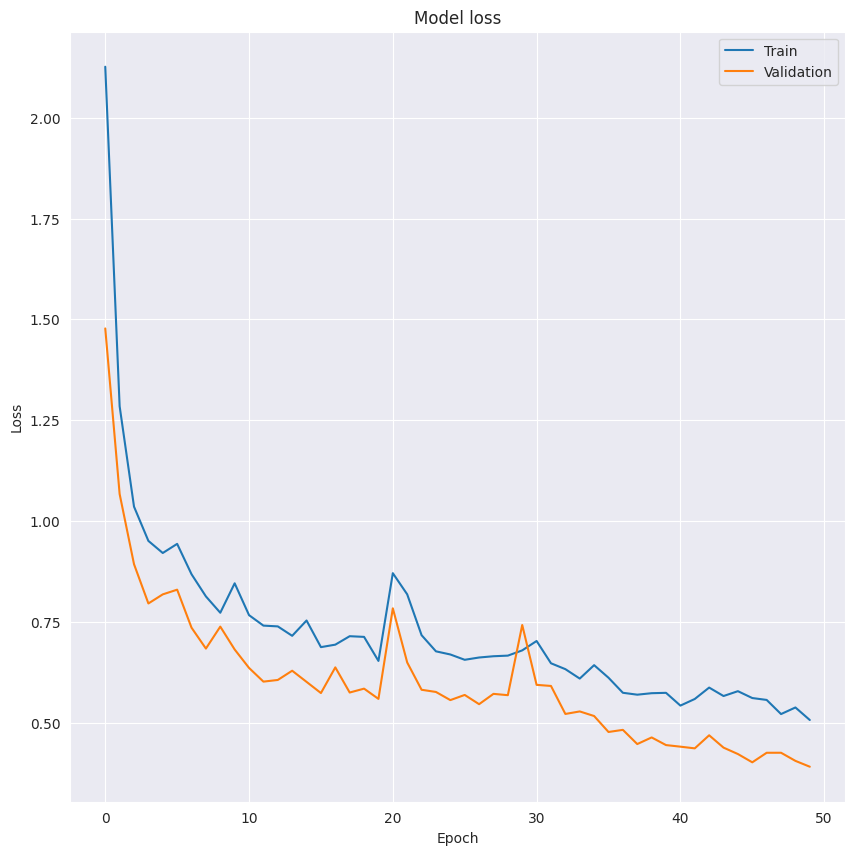

In [7]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

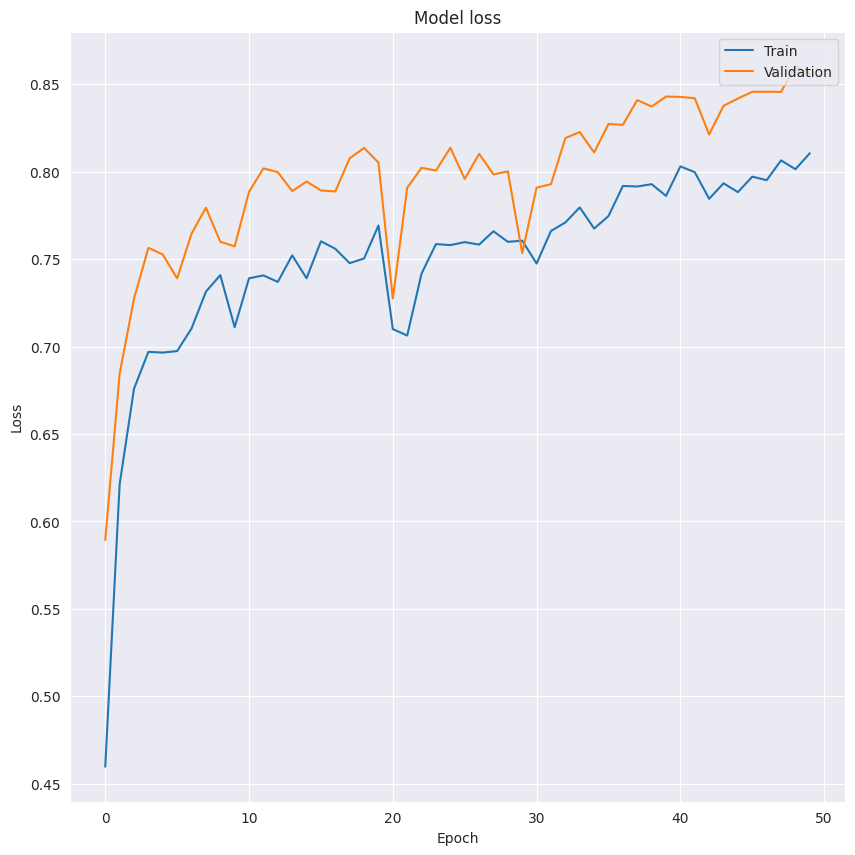

In [8]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [9]:
model.save('../models/characters.h5')

In [10]:
y_pred = model.predict(X_test)
predictions = np.argmax(y_pred, axis=2)
print(predictions)
major = mode(predictions, axis=1)[0].squeeze()
count = mode(predictions, axis=1)[1].squeeze()
print(f"Predictions    : {major}")
print(f"Appeared times : {count}")

 1/41 [..............................] - ETA: 17s

2023-04-16 23:19:43.436098: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-16 23:19:43.439157: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-16 23:19:43.441542: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

41/41 [==============================] - 1s 24ms/step
[[ 9  9  9 ...  8  8  8]
 [18 18 18 ...  4  4  4]
 [ 4  4  4 ...  4  4  4]
 ...
 [11 11 11 ... 11 11 11]
 [13 10 10 ... 10 10 10]
 [ 6  6  6 ...  6  6  6]]
Predictions    : [ 8  4  4 ... 11 10  6]
Appeared times : [147 110 150 ... 150 149 150]


/tmp/ipykernel_10556/310183563.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  major = mode(predictions, axis=1)[0].squeeze()
/tmp/ipykernel_10556/310183563.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  count = mode(predictions, axis=1)[1].squeeze()


In [11]:
def get_key(dictionary, val):
    for key, value in dictionary.items():
        if val == value:
            return key

predictions_list = []
for word in major:
    predictions_list.append(get_key(label_dict, word))
print(predictions_list)

['i', 'e', 'e', 'l', 'c', 's', 'g', 'l', 'g', 'm', 'c', 'j', 'k', 'v', 'x', 'u', 'k', 'q', 'b', 'p', 'l', 'v', 'o', 'v', 'j', 'f', 'b', 'x', 'o', 'd', 'm', 'e', 'b', 'x', 'j', 'h', 't', 't', 'g', 'm', 'k', 'j', 'y', 's', 'd', 'c', 'x', 'a', 'e', 'a', 'c', 'k', 'q', 'n', 'i', 'a', 't', 'j', 'u', 'p', 'q', 'u', 'x', 'z', 'y', 'z', 'c', 'e', 'l', 't', 'q', 'a', 'f', 'd', 'x', 'd', 's', 'j', 't', 'n', 'i', 'm', 'u', 'w', 'z', 'd', 'q', 'f', 'd', 'r', 'g', 'f', 'h', 'g', 'f', 'l', 'x', 'v', 't', 'n', 'q', 'y', 'j', 'u', 'b', 'x', 't', 'a', 'h', 'b', 'v', 'x', 'j', 'v', 'z', 'p', 'y', 'g', 'e', 'm', 'w', 'p', 'b', 'w', 'u', 'e', 'u', 'q', 'm', 'k', 'i', 'i', 'v', 'c', 'p', 'o', 'o', 'x', 'f', 'x', 'y', 'z', 'w', 'g', 'e', 'h', 'v', 'f', 'f', 'h', 'e', 'k', 'j', 'u', 'p', 'u', 'w', 'z', 'g', 'n', 'o', 'e', 'u', 'r', 'q', 'u', 'd', 'w', 'i', 'x', 'a', 'c', 'h', 'y', 'j', 's', 'y', 'i', 'p', 'd', 'l', 'x', 'b', 'z', 'z', 'h', 'w', 'j', 'x', 's', 'e', 'p', 'd', 'v', 'x', 'i', 'y', 'a', 'k', 'g',

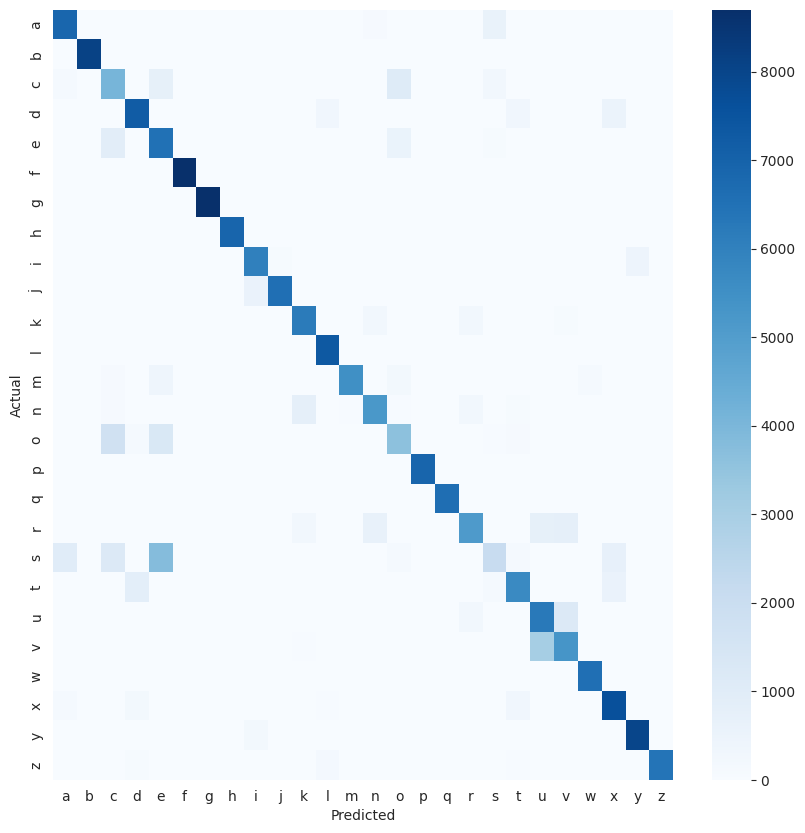

Accuracy: 84.18%


In [12]:
words_cm = confusion_matrix(y_test.argmax(axis=2).flatten(), y_pred.argmax(axis=2).flatten())
plt.subplots(figsize=(10, 10))
sns.heatmap(words_cm, annot=False, cmap='Blues', xticklabels=label_dict.keys(), yticklabels=label_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
accuracy = np.sum(np.diag(words_cm)) / np.sum(words_cm)
print(f"Accuracy: {accuracy*100:.2f}%")

In [13]:
print(classification_report(y_test.argmax(axis=2).flatten(), y_pred.argmax(axis=2).flatten()))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      7650
           1       1.00      1.00      1.00      8100
           2       0.50      0.63      0.56      6450
           3       0.84      0.86      0.85      8400
           4       0.51      0.80      0.62      8100
           5       1.00      1.00      1.00      8700
           6       1.00      1.00      1.00      8700
           7       1.00      1.00      1.00      6900
           8       0.88      0.92      0.90      6600
           9       0.98      0.91      0.95      7200
          10       0.84      0.90      0.87      6900
          11       0.93      1.00      0.96      7350
          12       0.99      0.85      0.91      6450
          13       0.81      0.79      0.80      6600
          14       0.63      0.51      0.57      7050
          15       1.00      1.00      1.00      6900
          16       1.00      1.00      1.00      6600
          17       0.85    

In [ ]:
engine = pyttsx3.init()
engine.say(", ".join(predictions_list))
engine.runAndWait()